In [1]:
import networkx as nx
import community as c
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import pandas as pd

In [2]:
G_fb = nx.read_edgelist("facebook_combined.txt.gz", create_using = nx.Graph(), nodetype=int)

In [3]:
closeCent = nx.closeness_centrality(G_fb)
degCent = nx.degree_centrality(G_fb)
betCent = nx.betweenness_centrality(G_fb, endpoints=True, normalized=True)

In [13]:
pos = nx.spring_layout(G_fb) #setting layout
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in degCent.values()]


C:\Users\mateg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-0.501437778559209,
 0.8485398140285386,
 -1.083259493324669,
 0.7259321236968435)

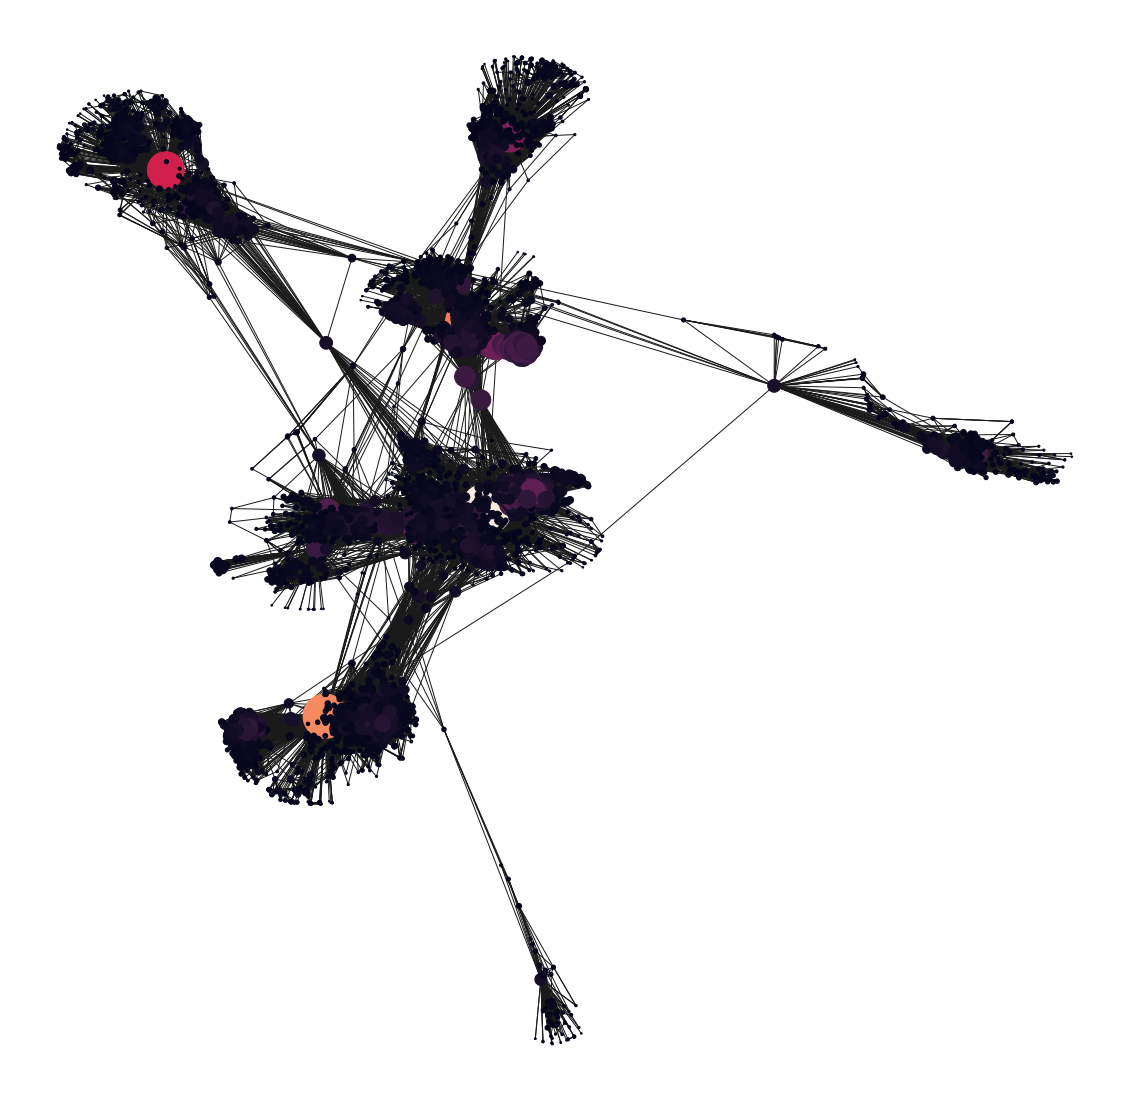

In [14]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

C:\Users\mateg\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


(-1.1044100017721679,
 1.1044102996618268,
 -1.104410249571107,
 1.104410248558216)

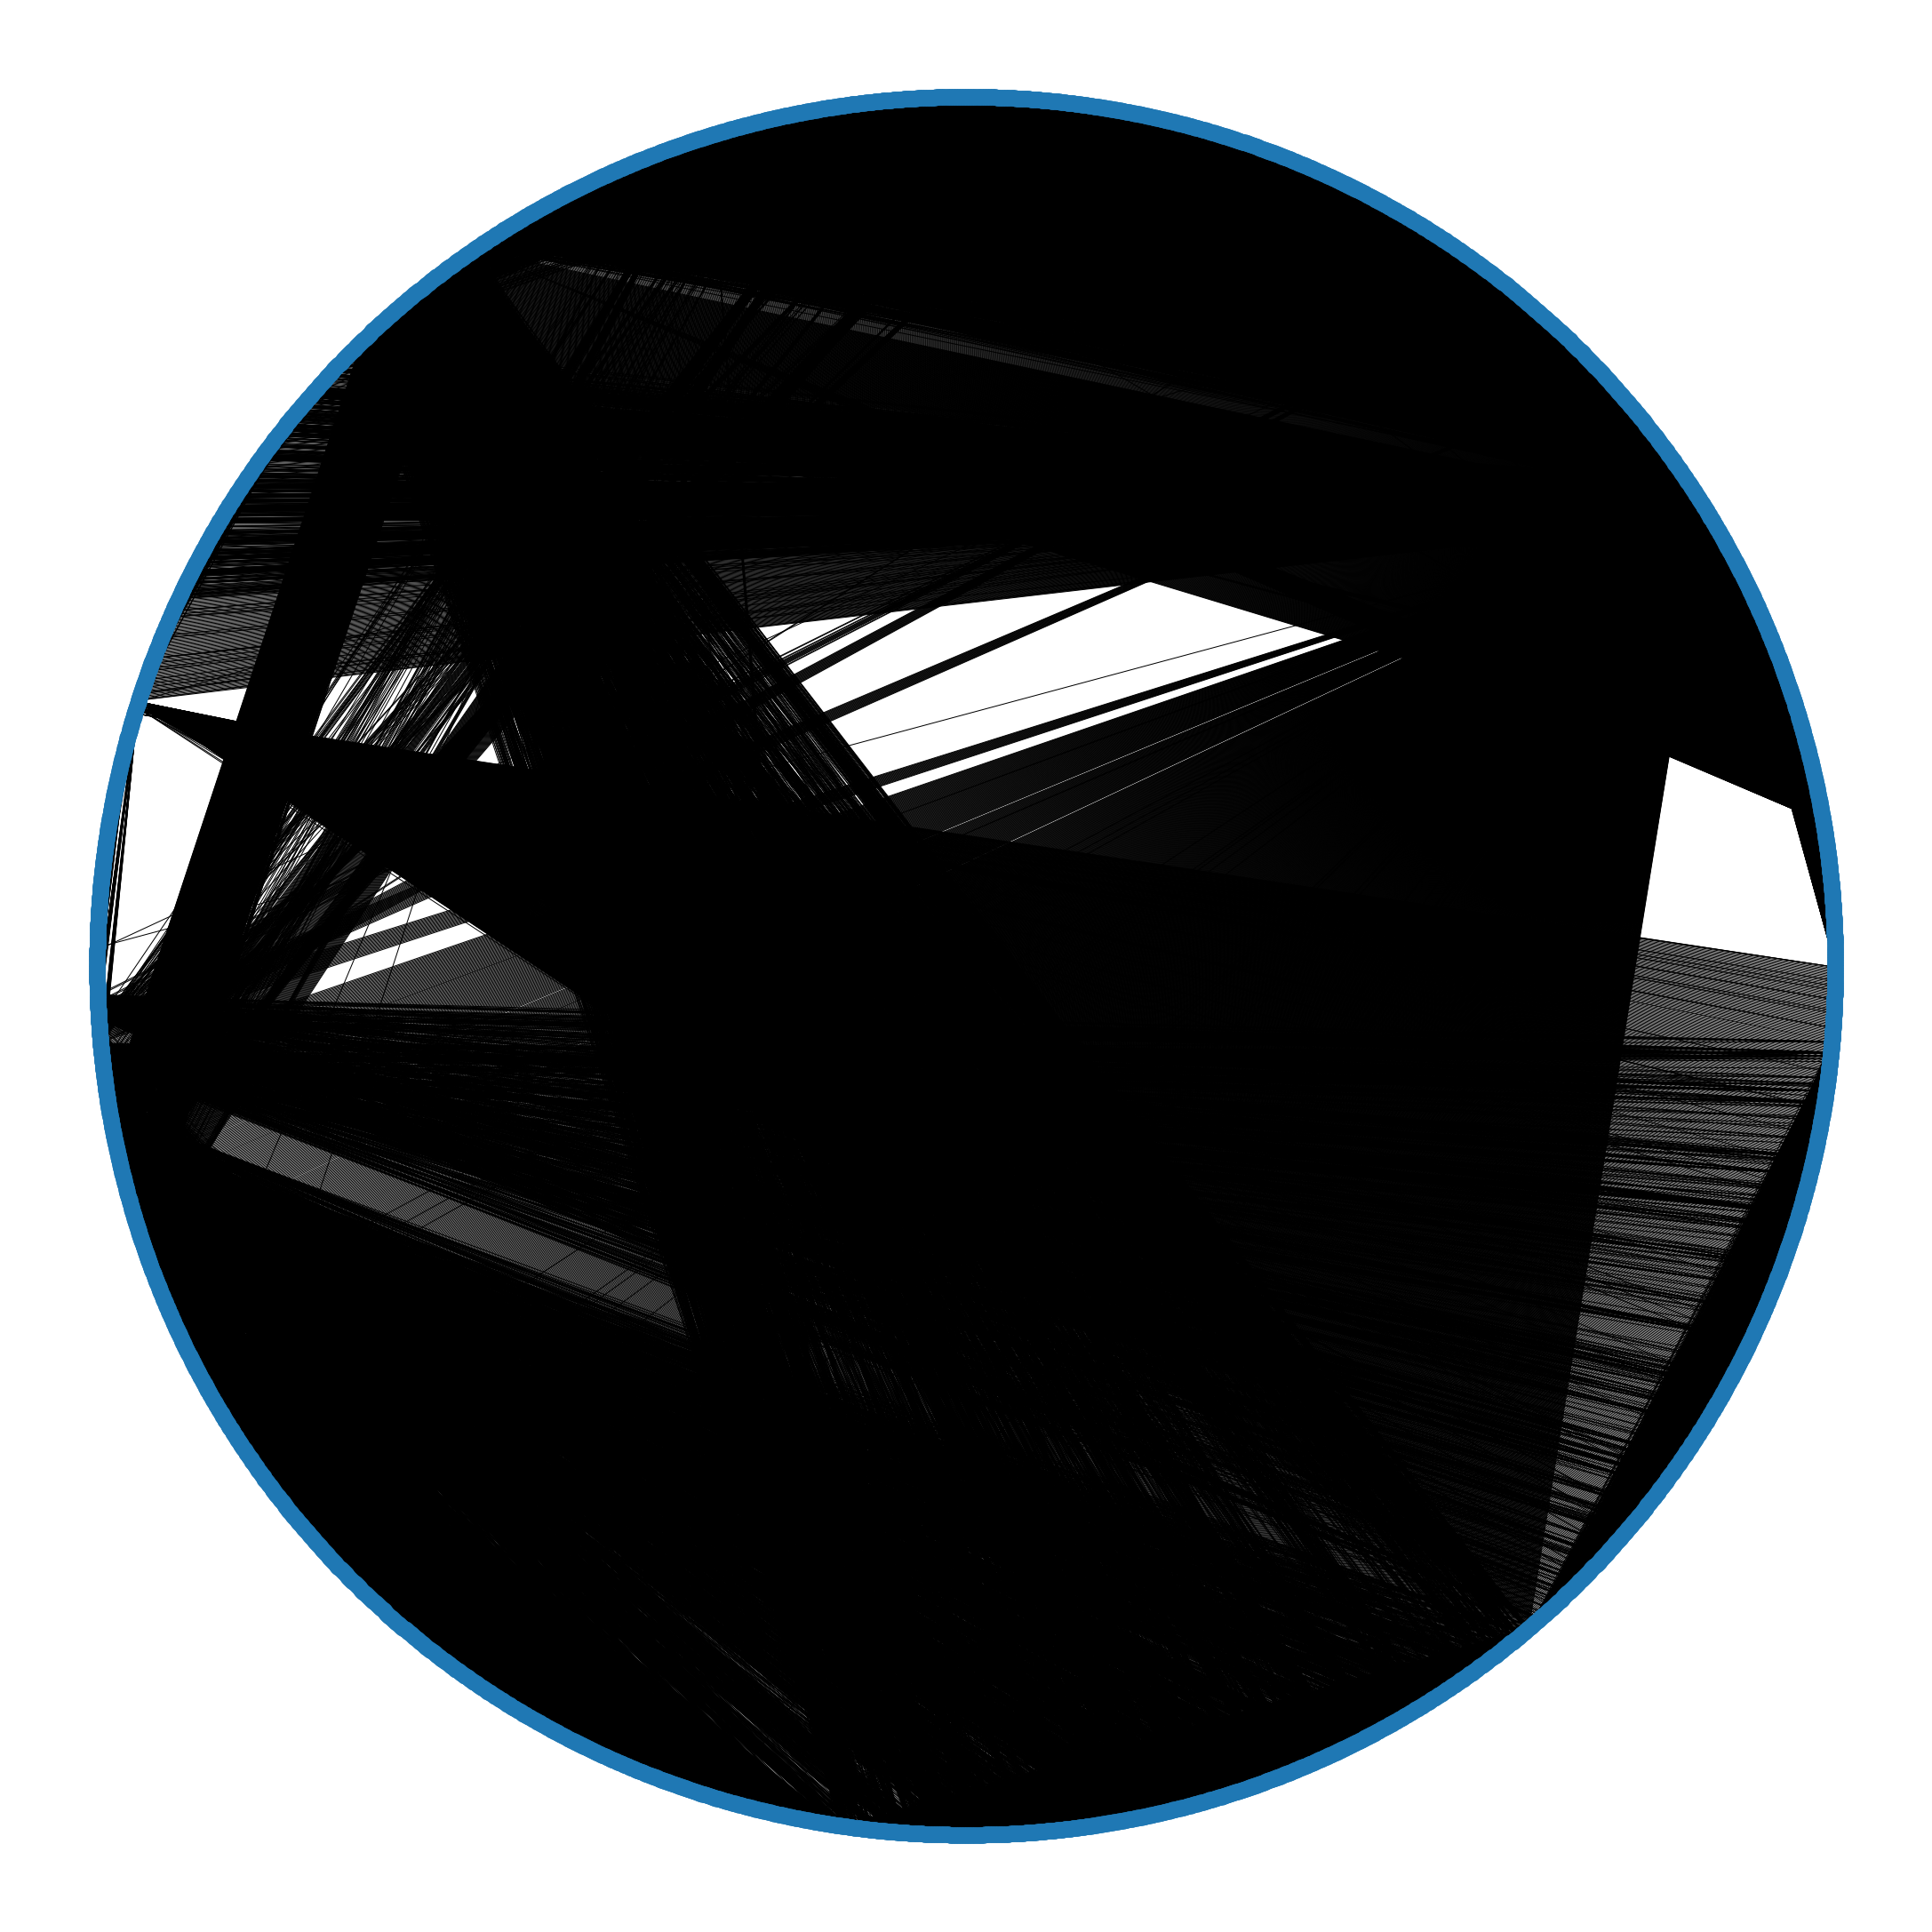

In [6]:
plt.figure(figsize=(30,30))
nx.draw_circular(G_fb)
plt.axis('off')

[(0, 200)]

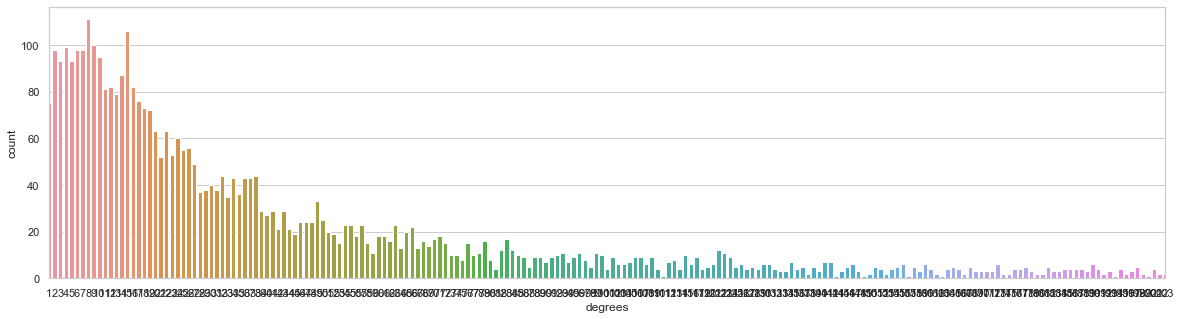

In [12]:
degree_sequence = sorted([d for n, d in G_fb.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(x="degrees", y="count", data=dataset_barplot)
ax.set(xlim=(0, 200))

[(0, 0.04)]

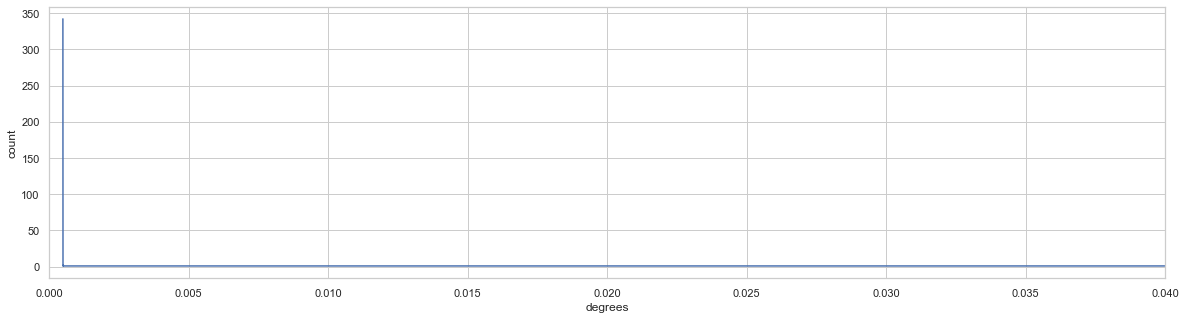

In [8]:
degreeCount = collections.Counter(betCent.values())
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.lineplot(x="degrees", y="count", data=dataset_barplot)
ax.set(xlim=(0, 0.04))

[(0, 0.04)]

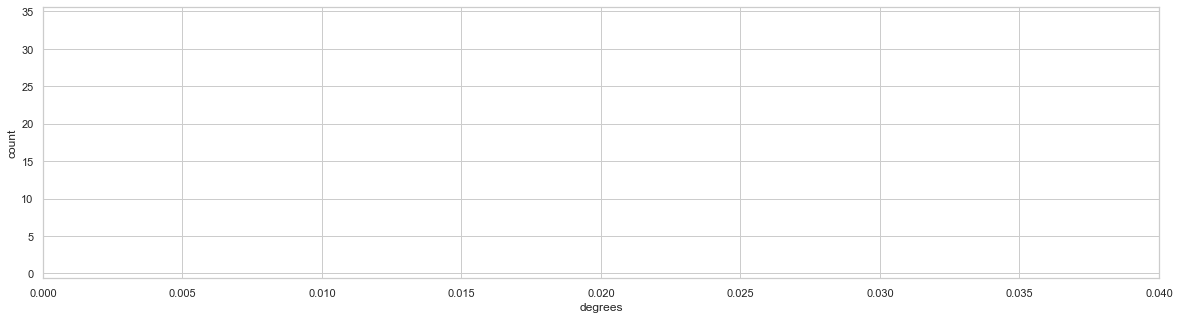

In [9]:
degreeCount = collections.Counter(closeCent.values())
deg, cnt = zip(*degreeCount.items())
dataset_barplot = pd.DataFrame()
dataset_barplot["degrees"] = list(deg)
dataset_barplot["count"] = list(cnt)
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.lineplot(x="degrees", y="count", data=dataset_barplot)
ax.set(xlim=(0, 0.04))